In [83]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import pandas as pd
import seaborn as sns
import numpy as np
#import arviz as az
#import scipy as sp
import warnings
#from statsmodels import datasets


%matplotlib inline
warnings.simplefilter(action="ignore", category=FutureWarning)

az.style.use("default")

SEED = 845199

SAMPLE_KWARGS = {
    'chains': 2,
    
    'random_seed': [
        SEED,
        SEED + 1,
    
    ]
}

In [71]:
# Import data as pandas dataframe
df = pd.read_csv('./df_2mm_burnished.csv', index_col=[0])
df.columns

Index(['specimen_No', 'force_kg', 'feed_mm_min', 'cycles_to_failure',
       'rolling_direction', 'burnished_regime', 'HV10', 'amp_stress_main',
       'log_cycles'],
      dtype='object')

In [72]:
# Set data types

def set_dtypes(df):
    df['specimen_No'] = df['specimen_No'].astype('string')
    df['rolling_direction'] = df['rolling_direction'].astype('string')
    df['force_kg'] = df['force_kg'].astype('int8')
    df['feed_mm_min'] = df['feed_mm_min'].astype('int8')
    df['burnished_regime'] = df['burnished_regime'].astype('int8')
    
    return df    

In [73]:
df_set = set_dtypes(df)
df_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 33
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   specimen_No        28 non-null     string 
 1   force_kg           28 non-null     int8   
 2   feed_mm_min        28 non-null     int8   
 3   cycles_to_failure  28 non-null     int64  
 4   rolling_direction  28 non-null     string 
 5   burnished_regime   28 non-null     int8   
 6   HV10               6 non-null      float64
 7   amp_stress_main    28 non-null     float64
 8   log_cycles         28 non-null     float64
dtypes: float64(3), int64(1), int8(3), string(2)
memory usage: 1.6 KB


# Creating dataframe with burnished specimens

In [74]:
df.columns

Index(['specimen_No', 'force_kg', 'feed_mm_min', 'cycles_to_failure',
       'rolling_direction', 'burnished_regime', 'HV10', 'amp_stress_main',
       'log_cycles'],
      dtype='object')

In [75]:
# Only colums needed for the model
df_burnished = df_set[['burnished_regime','force_kg', 'feed_mm_min', 'log_cycles','rolling_direction']] 
df_burnished.head()

,burnished_regime,force_kg,feed_mm_min,log_cycles,rolling_direction
0,1,-1,-1,5.188,RD
1,2,-1,0,5.085,RD
2,3,-1,1,5.040,RD
3,4,0,-1,5.228,RD
4,5,0,0,5.344,RD


Text(0, 0.5, '$Log(N_{f,b})$')

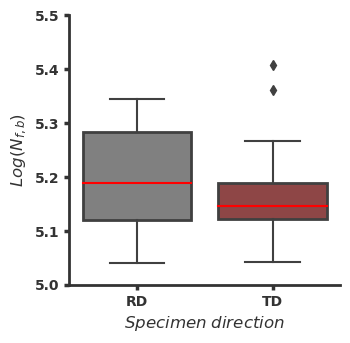

In [76]:
plt.figure(figsize= (3.5,3.5))
           
ax = sns.boxplot(x='rolling_direction', y='log_cycles', data = df_burnished,
            saturation = 0.5, palette =['gray', 'firebrick'],
                boxprops={"linewidth": 2.0}, medianprops={"color": "red"})

ax.set_ylim(ymin =5.0, ymax =5.5)

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2.0)
    ax.spines[axis].set_color('0.2')
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



ax.tick_params(width =2.5, color = '0.2')

plt.xticks(size=10, weight = 'bold', color = '0.2')
plt.yticks(size=10, weight = 'bold', color = '0.2')

ax.set_xlabel('$Specimen \; direction$', fontsize =12, style ='italic', weight= 'bold', color = '0.2')
ax.set_ylabel('$Log(N_{f,b})$', fontsize =12, style ='italic', weight= 'bold', color = '0.2')

#plt.savefig('fig6_box.png', bbox_inches ='tight', dpi = 300, facecolor = ax.get_facecolor())

# Burnished specimens - statistic

In [77]:
df_burnished.groupby(['force_kg'])['log_cycles'].agg( [np.median,np.mean,np.std] )

,median,mean,std
force_kg,,,
-1,5.0995,5.09975,0.048201
0,5.1805,5.18840,0.063511
1,5.2750,5.25420,0.097789


In [78]:
df_burnished.groupby(['feed_mm_min'] )['log_cycles'].agg( [np.median,np.mean,np.std] )

,median,mean,std
feed_mm_min,,,
-1,5.2080,5.227333,0.087571
0,5.1365,5.178714,0.105703
1,5.1775,5.169750,0.082818


<AxesSubplot:xlabel='feed_mm_min', ylabel='log_cycles'>

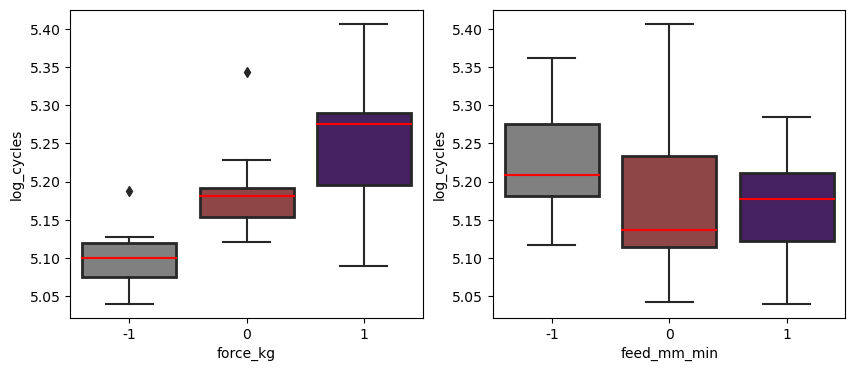

In [79]:
f, ax = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw=dict(width_ratios=[4, 4]))

sns.boxplot(x='force_kg', y='log_cycles', data = df_burnished,
            saturation = 0.5, palette =['gray', 'firebrick','indigo'],
                boxprops={"linewidth": 2.0}, medianprops={"color": "red"}, ax = ax[0])

sns.boxplot(x='feed_mm_min', y='log_cycles', data = df_burnished,
            saturation = 0.5, palette =['gray', 'firebrick','indigo'],
                boxprops={"linewidth": 2.0}, medianprops={"color": "red"}, ax = ax[1])


In [80]:
df_median_mean_std = df_burnished.groupby(['rolling_direction'])['log_cycles'].agg([lambda x: np.quantile(x,0.75, axis =0),lambda x: np.quantile(x,0.25, axis =0), np.median] )
df_median_mean_std

,<lambda_0>,<lambda_1>,median
rolling_direction,,,
RD,5.284,5.1210,5.188
TD,5.188,5.1215,5.146


In [81]:
df_median_mean_std.diff()

,<lambda_0>,<lambda_1>,median
rolling_direction,,,
RD,NaN,NaN,NaN
TD,-0.096,0.0005,-0.042


In [82]:
df_median_mean_std.pct_change()

,<lambda_0>,<lambda_1>,median
rolling_direction,,,
RD,NaN,NaN,NaN
TD,-0.018168,0.000098,-0.008096
